## Temperleme Kırılma Modeli



# Yüklemeler

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay



## Load data

In [ ]:
#df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Temperleme_Denemeler/AK0001C.xlsx", sheet_name="Sayfa2")
df = pd.read_excel("Temperleme_Denemeler/AK0001C.xlsx", sheet_name="Sayfa2")
df.shape # (rows, columns)

(447, 19)

In [ ]:
df.head()

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı,Kırılma
0,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1
1,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1
2,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1
3,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1
4,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,26,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   S                       447 non-null    int64
 1   T2                      447 non-null    int64
 2   T3                      447 non-null    int64
 3   T4                      447 non-null    int64
 4   T5                      447 non-null    int64
 5   T6                      447 non-null    int64
 6   T7                      447 non-null    int64
 7   T8                      447 non-null    int64
 8   T9                      447 non-null    int64
 9   T10                     447 non-null    int64
 10  T11                     447 non-null    int64
 11  AB1                     447 non-null    int64
 12  AB2                     447 non-null    int64
 13  AB3                     447 non-null    int64
 14  ÜB1                     447 non-null    int64
 15  ÜB2                    

In [ ]:
df.columns

Index(['S', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'AB1', 'AB2', 'AB3', 'ÜB1', 'ÜB2', 'ÜB3', 'Şoklama Hava Sıcaklığı',
       'Kırılma'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı,Kırılma
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,553.131991,567.505593,586.465324,605.771812,622.639821,639.463087,646.355705,652.774049,653.275168,652.033557,652.087248,32.100671,31.498881,36.588367,7.165548,7.114094,8.429530,33.315436,0.818792
std,12.129275,9.703420,6.212820,4.211005,4.412836,2.256600,4.925554,4.593371,4.557838,3.279402,3.430148,3.681389,4.218194,6.835062,2.238949,2.764761,9.304217,4.279088,0.385622
min,550.000000,565.000000,570.000000,580.000000,620.000000,630.000000,630.000000,635.000000,632.000000,633.000000,630.000000,28.000000,27.000000,28.000000,6.000000,6.000000,6.000000,24.000000,0.000000
25%,550.000000,565.000000,585.000000,605.000000,620.000000,640.000000,645.000000,650.000000,655.000000,653.000000,653.000000,28.000000,28.500000,35.000000,6.000000,6.000000,6.000000,30.000000,1.000000
50%,550.000000,565.000000,585.000000,605.000000,620.000000,640.000000,645.000000,655.000000,655.000000,653.000000,653.000000,30.000000,30.000000,36.000000,6.000000,6.000000,6.000000,32.000000,1.000000
75%,550.000000,565.000000,585.000000,605.000000,630.000000,640.000000,652.000000,655.000000,655.000000,653.000000,653.000000,36.000000,33.000000,36.000000,8.000000,7.000000,7.000000,37.000000,1.000000
max,600.000000,605.000000,610.000000,620.000000,630.000000,640.000000,652.000000,660.000000,660.000000,662.000000,662.000000,44.000000,45.000000,70.000000,43.000000,43.000000,68.000000,44.000000,1.000000


# Grafikler

(array([ 1.,  1.,  0.,  8.,  0., 13.,  0., 23., 48.,  0., 48.,  0., 43.,
         0., 39., 27.,  0., 33.,  0., 26.,  0., 23., 27.,  0., 20.,  0.,
        19.,  0., 17., 14.,  0., 10.,  0.,  6.,  1.]),
 array([24.        , 24.57142857, 25.14285714, 25.71428571, 26.28571429,
        26.85714286, 27.42857143, 28.        , 28.57142857, 29.14285714,
        29.71428571, 30.28571429, 30.85714286, 31.42857143, 32.        ,
        32.57142857, 33.14285714, 33.71428571, 34.28571429, 34.85714286,
        35.42857143, 36.        , 36.57142857, 37.14285714, 37.71428571,
        38.28571429, 38.85714286, 39.42857143, 40.        , 40.57142857,
        41.14285714, 41.71428571, 42.28571429, 42.85714286, 43.42857143,
        44.        ]),
 <BarContainer object of 35 artists>)

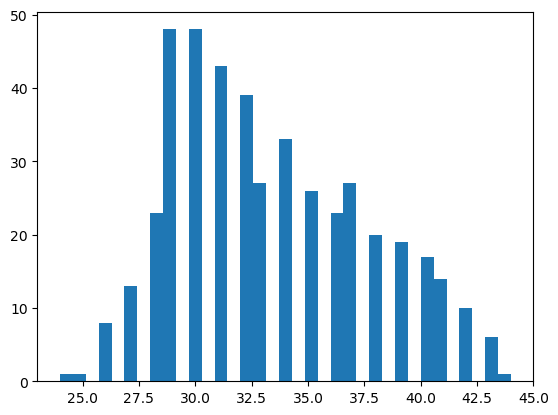

In [ ]:
# Check the distribution of the Şoklama Hava Sıcaklığı column with a histogram
#df['Şoklama Hava Sıcaklığı'].plot.hist();
#plt.show()
#ploting histogram
fig, ax = plt.subplots()
ax.hist(df['Şoklama Hava Sıcaklığı'], bins=35, )


In [ ]:
ds=pd.crosstab(df['Şoklama Hava Sıcaklığı'], df['Kırılma'])
ds.head()

Kırılma,0,1
Şoklama Hava Sıcaklığı,,
24,0,1
25,0,1
26,0,8
27,2,11
28,2,21


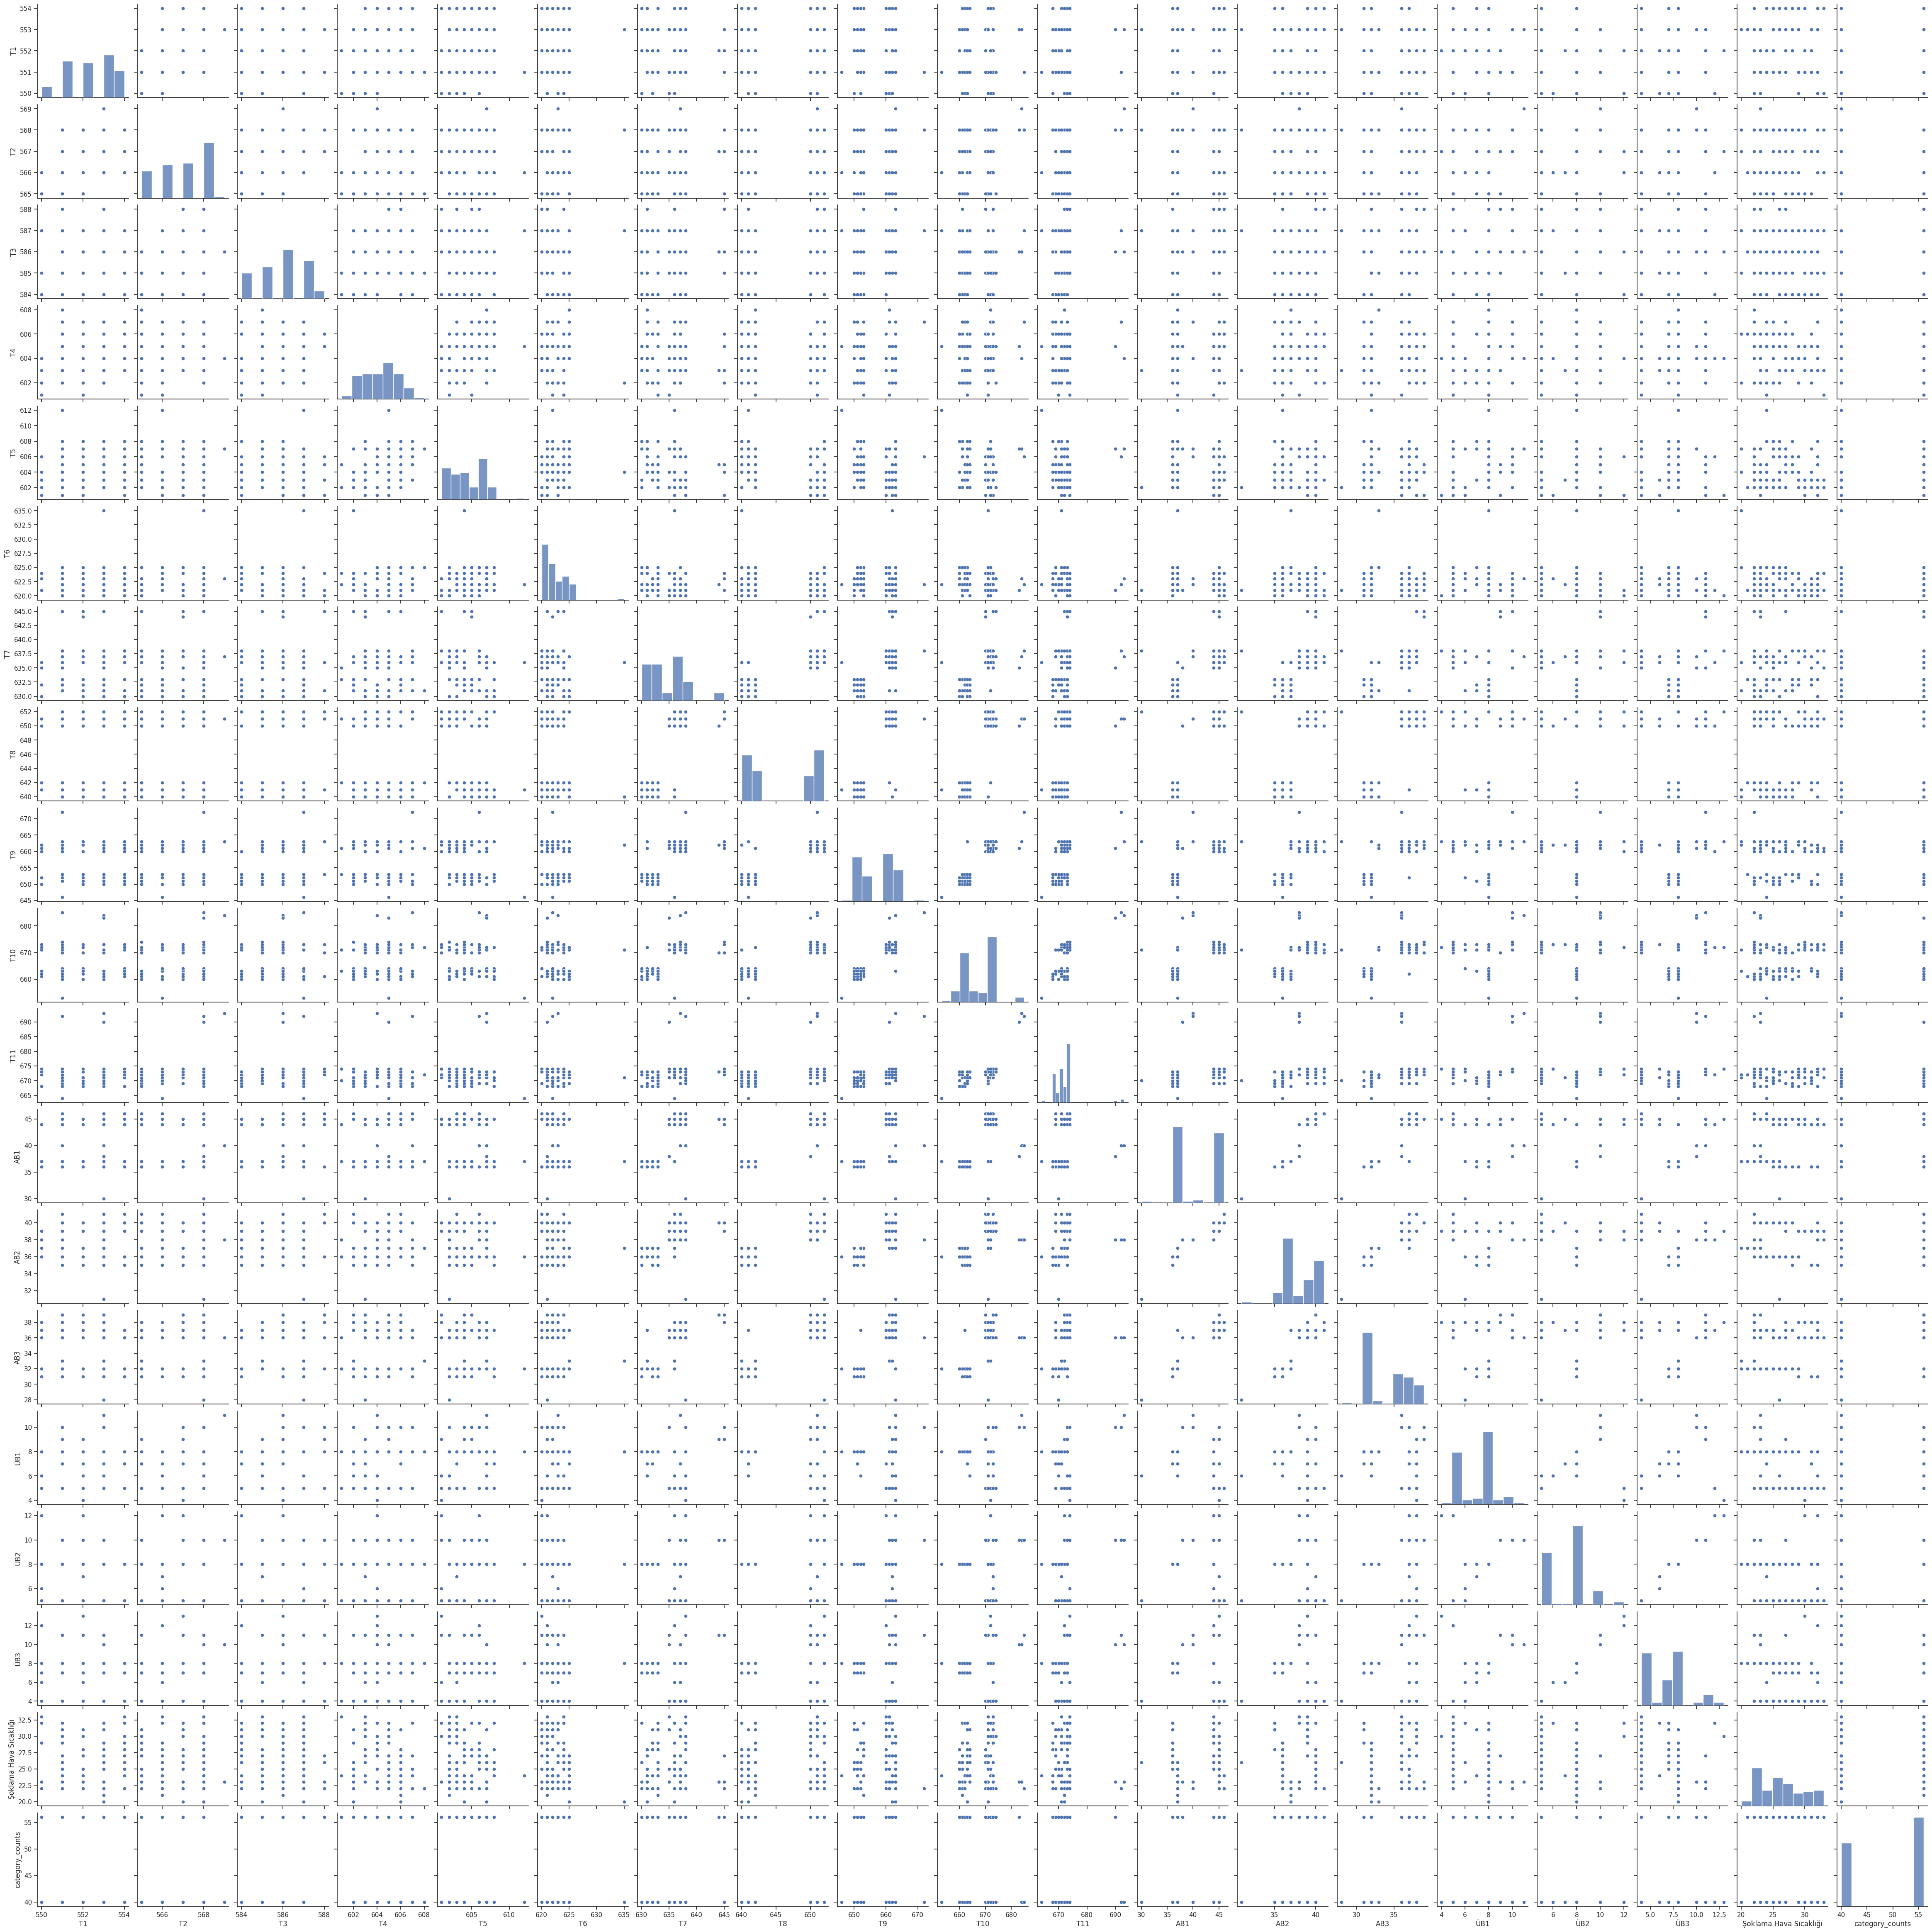

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)


In [ ]:
# Make a correlation matrix
df.corr()

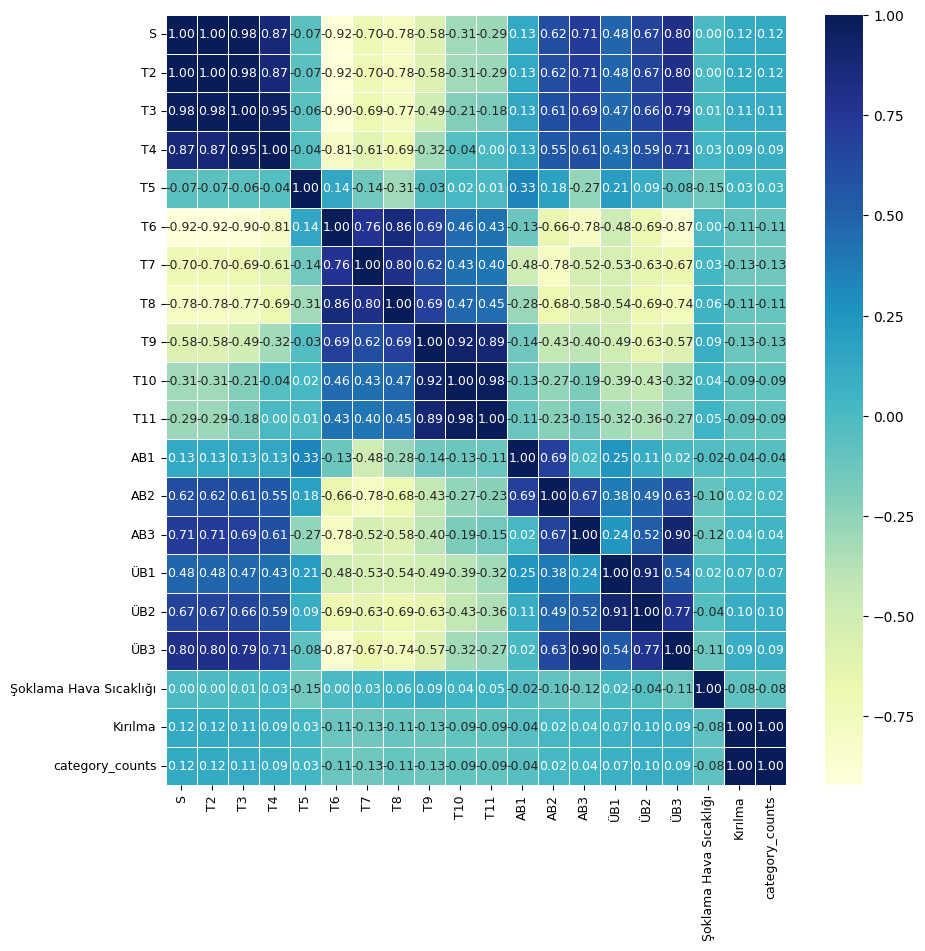

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10), )
#ax.set_xlabel('X Label', fontsize=9)  # set x-axis label font size
#ax.set_ylabel('Y Label', fontsize=9)  # set y-axis label font size
ax.tick_params(axis='x', labelsize=9) # set x-axis tick label font size
ax.tick_params(axis='y', labelsize=9) # set x-axis tick label font size
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".2f",
                 cmap="YlGnBu", annot_kws={"size": 9});
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0, top - 0)
ax.tick_params(axis='y', labelsize=9) # set x-axis tick label font size

## 5. Modelling

In [ ]:
df.head()

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı,Kırılma,category_counts
0,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1,366
1,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,28,1,366
2,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1,366
3,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,27,1,366
4,600,605,610,620,620,630,630,635,640,650,650,31,45,70,10,17,55,26,1,366


In [ ]:
# Split data into X and y
X = df.drop(['Kırılma'], axis=1)

y = df["Kırılma"]

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

,S,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,AB1,AB2,AB3,ÜB1,ÜB2,ÜB3,Şoklama Hava Sıcaklığı
17,600,605,610,620,620,630,630,635,643,646,647,44,43,48,10,10,19,44
66,550,565,585,605,630,640,645,650,650,650,650,37,31,31,8,7,8,30
176,550,565,585,605,620,640,645,655,655,653,653,36,33,35,7,6,6,33
247,550,565,585,605,620,640,645,655,655,653,653,30,30,36,6,6,6,31
31,550,565,585,605,630,640,645,650,650,650,650,33,32,33,9,9,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,550,565,585,605,630,640,645,650,655,653,653,36,35,35,8,8,8,34
270,550,565,585,605,620,640,645,655,655,653,653,30,30,36,6,6,6,32
348,550,565,585,605,620,640,652,655,655,653,653,30,30,37,6,6,6,38
435,550,565,585,605,620,640,652,655,655,653,653,28,27,36,6,6,6,36



1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
Modellerinden en uygun olanı seçildi.

### Model Seçimi:

In [ ]:
from sklearn.pipeline import Pipeline
# Create a pipeline
pipe = Pipeline([('Classifier', LogisticRegression())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Classifier': [LogisticRegression(solver='liblinear',max_iter=1500)],
                 'Classifier__C': np.logspace(1, 10, 100,1000),
                 'Classifier__penalty':['l1','l2']},
                {'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[3,4,5,6,7]},
                {'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [100, 200,300,400,500],
                 'Classifier__max_features': [6,7,8,9,10]}]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
best_model.best_estimator_.get_params()

# LG modeli ile %86 doğrulukla model oluşturuldu.

In [ ]:
model=LogisticRegression(C=23.00015839195382313198, penalty='l2', solver='liblinear', max_iter=1500, random_state=42, tol=0.0001, intercept_scaling=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [ ]:
# Make predictions with tuned model
y_preds = model.predict(X_test)

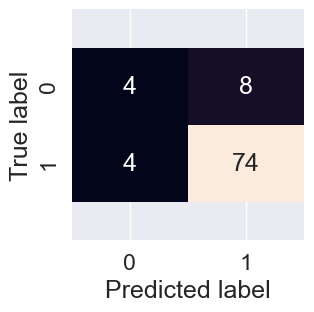

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        12
           1       0.90      0.95      0.92        78

    accuracy                           0.87        90
   macro avg       0.70      0.64      0.66        90
weighted avg       0.85      0.87      0.85        90



## Model içindeki parametrelerin çarpan etkileri sıra ile aşağıda verilmiştir.

<Axes: >

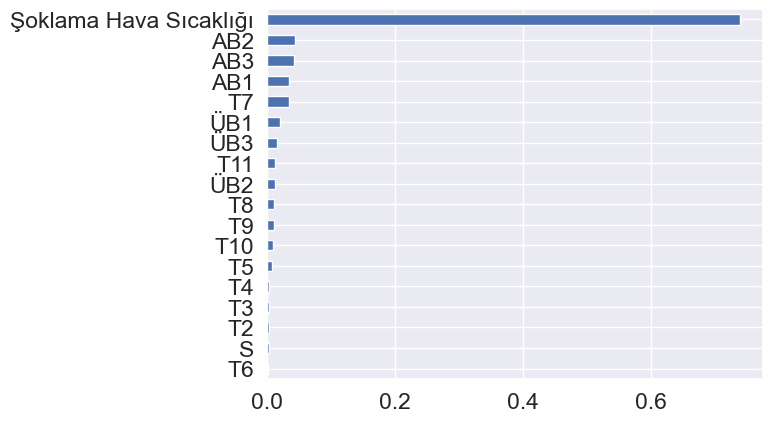

In [ ]:
imp = pd.Series(data=model.feature_importances_,index=X.columns)
imp.sort_values(ascending=True, inplace=True)
imp.plot(kind='barh')